## Data Preparation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import os

def parse_hmm(fname):
    f = open(fname)
    line=f.readline()
    while line[0]!='#':
        line=f.readline()
    f.readline()
    f.readline()
    f.readline()
    f.readline()
    seq = []
    extras = np.zeros([0,10])
    prob = np.zeros([0,20])
    line = f.readline()
    while line[0:2]!='//':
        lineinfo = line.split()
        seq.append(lineinfo[0])
        probs_ = [2**(-float(lineinfo[i])/1000) if lineinfo[i]!='*' else 0. for i in range(2,22)]
        prob = np.concatenate((prob,np.matrix(probs_)),axis=0)

        line = f.readline()
        lineinfo = line.split()
        extras_ = [2**(-float(lineinfo[i])/1000) if lineinfo[i]!='*' else 0. for i in range(0,10)]
        extras = np.concatenate((extras,np.matrix(extras_)),axis=0)

        line = f.readline()
        assert len(line.strip())==0

        line = f.readline()
    return (''.join(seq),prob,extras)

def process_data(data_dir):
    """
    Read all HMM files in the given directory and process them.

    Args:
        data_dir (str): The path to the directory containing the HMM files.

    Returns:
        list: A list of tuples, each tuple contains the sequence, the probability matrix, the log-probability matrix, and the extra features.
    """
    data = []
    for filename in os.listdir(data_dir):
        if filename.endswith('.txt'):
            filepath = os.path.join(data_dir, filename)
            seq, prob, extras = parse_hmm(filepath)
            data.append((seq, prob, extras))
    return data





In [4]:
def parse_pssm(fname):
    f = open(fname)

    f.readline()
    f.readline()
    f.readline()
    seq = []
    lprob = np.zeros([0,20])
    prob = np.zeros([0,20])
    extra = np.zeros([0,2])
    line = f.readline()
    while len(line.strip())>0:
        lineinfo = line.split()
        seq.append(lineinfo[1])
        lprobs_ = [float(lineinfo[i]) for i in range(2,22)]
        lprob = np.concatenate((lprob,np.matrix(lprobs_)),axis=0)
        probs_ = [float(lineinfo[i])/100 for i in range(22,42)]
        prob = np.concatenate((prob,np.matrix(probs_)),axis=0)
        extras_ = [float(lineinfo[i]) for i in range(42,44)]
        extra = np.concatenate((extra,np.matrix(extras_)),axis=0)
        line = f.readline()

    return (''.join(seq),prob,lprob,extra)

def process_data_pssm(data_dir):
    """
    Read all PSSM files in the given directory and process them.

    Args:
        data_dir (str): The path to the directory containing the PSSM files.

    Returns:
        list: A list of tuples, each tuple contains the sequence, the probability matrix, the log-probability matrix, and the extra features.
    """
    data = []
    for filename in os.listdir(data_dir):
        if filename.endswith('.txt'):
            filepath = os.path.join(data_dir, filename)
            seq, prob, lprob, extras = parse_pssm(filepath)
            data.append((seq, prob, lprob, extras))
    return data





In [5]:
import os

benchmark_hmm_file = "/content/drive/MyDrive/Dataset/Benchmark_HMM"
novel_hmm_file = "/content/drive/MyDrive/Dataset/Novel_HMM"


In [6]:
benchmark_pssm_file = "/content/drive/MyDrive/Dataset/Benchmark_PSSM"
novel_pssm_file = "/content/drive/MyDrive/Dataset/Novel_PSSM"


In [7]:
bench_HMM = process_data(benchmark_hmm_file)


In [8]:
novel_HMM = process_data(novel_hmm_file)


In [9]:
bench_PSSM = process_data_pssm(benchmark_pssm_file)
novel_PSSM = process_data_pssm(novel_pssm_file)

In [49]:
len(novel_HMM),len(bench_HMM)

(122, 578)

In [11]:
bench_HMM

[('MNWRSERIWIELITGSRKTSNLCWACILFLGSLGFLLVGTSSYLGRNLISLFPSQQILFFPQGIVMSFYGIAGLFISSYLWCTILWNVGSGYDRFDRKEGIVCIFRWGFPGRNRRIFFRFLMRDIRSIRMEVKEGIYPRRVLSIEIRSQGSIPLTRTDENFTPREIEQKAAELAYFLRVPIEVFRTKEWILSRHGVGNPRILFNTTDLSSEQLLIRSKHVSVRSYFRSLLFPVCG',
  matrix([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 1., 0.],
          ...,
          [0., 0., 0., ..., 1., 0., 0.],
          [0., 1., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]),
  matrix([[1. , 0. , 0. , ..., 0.5, 1. , 1. ],
          [1. , 0. , 0. , ..., 0.5, 1. , 1. ],
          [1. , 0. , 0. , ..., 0.5, 1. , 1. ],
          ...,
          [1. , 0. , 0. , ..., 0.5, 1. , 1. ],
          [1. , 0. , 0. , ..., 0.5, 1. , 1. ],
          [1. , 0. , 0. , ..., 0.5, 1. , 1. ]])),
 ('MQLHMNLPTSRIAAGASINVRPAPLLRTAAPKRVCKHIVRAENNPSTPPPSSPSPPPPPPTPAAPTVTEVMGFSGAPEIINGRLAMLGFVAALGAELSTGESVLTQLGDQPTLIALTFVLFSAASLIPAFARRKGDAMGPFTPDAEMTNGRFAMIGFAAMLVYEGIQGIALF',
  matrix([[0.     

In [78]:
bench_HMM[15][2].shape

(287, 10)

In [57]:
novel_HMM

[('MECSLQKQLFNNGDKLFSSRHNRRVSIEQVHVTDSLSVNSINLFHKPICYPISSIITSRKSKSHFSVCATRRRRVHSNSDTYVLLEAGQDEQFVTEDELKAKLRGWLENWPVNSLPPDLARFDDLDEAVDFLVKAVCELEIDGEVGSVQWYQVRLE',
  matrix([[0.        , 0.        , 0.        , ..., 0.04863032, 0.        ,
           0.        ],
          [0.0882659 , 0.        , 0.        , ..., 0.16221735, 0.        ,
           0.        ],
          [0.05921063, 0.08449443, 0.        , ..., 0.10889427, 0.        ,
           0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
           0.        ],
          [0.        , 0.        , 0.        , ..., 0.07999203, 0.03991293,
           0.        ],
          [0.        , 0.        , 0.07184343, ..., 0.        , 0.        ,
           0.        ]]),
  matrix([[1.        , 0.        , 0.        , ..., 0.15114446, 1.        ,
           1.        ],
          [1.        , 0.        , 0.        , ..., 0.15114446, 1.        ,
           1.        ],
          [1.        

In [79]:
def inspect_processed(name, data, n=3):
    print(f"\n==== {name} ====")
    print("Type:", type(data))
    print("Length (#proteins):", len(data))
    print("First element type:", type(data[0]))
    print("First element length:", len(data[0]) if hasattr(data[0], "__len__") else "no len")

    for i in range(min(n, len(data))):
        item = data[i]
        print(f"\n-- {name}[{i}] --")
        print("item type:", type(item))
        print("item len:", len(item))
        for k, part in enumerate(item):
            if isinstance(part, str):
                print(f"  part[{k}] is sequence string, len={len(part)}")
            else:
                arr = np.asarray(part)
                print(f"  part[{k}] type={type(part).__name__}, shape={arr.shape}, ndim={arr.ndim}")

import numpy as np

inspect_processed("bench_HMM", bench_HMM)
inspect_processed("bench_PSSM", bench_PSSM)
inspect_processed("novel_HMM", novel_HMM)
inspect_processed("novel_PSSM", novel_PSSM)



==== bench_HMM ====
Type: <class 'list'>
Length (#proteins): 578
First element type: <class 'tuple'>
First element length: 3

-- bench_HMM[0] --
item type: <class 'tuple'>
item len: 3
  part[0] is sequence string, len=235
  part[1] type=matrix, shape=(235, 20), ndim=2
  part[2] type=matrix, shape=(235, 10), ndim=2

-- bench_HMM[1] --
item type: <class 'tuple'>
item len: 3
  part[0] is sequence string, len=172
  part[1] type=matrix, shape=(172, 20), ndim=2
  part[2] type=matrix, shape=(172, 10), ndim=2

-- bench_HMM[2] --
item type: <class 'tuple'>
item len: 3
  part[0] is sequence string, len=131
  part[1] type=matrix, shape=(131, 20), ndim=2
  part[2] type=matrix, shape=(131, 10), ndim=2

==== bench_PSSM ====
Type: <class 'list'>
Length (#proteins): 578
First element type: <class 'tuple'>
First element length: 4

-- bench_PSSM[0] --
item type: <class 'tuple'>
item len: 4
  part[0] is sequence string, len=942
  part[1] type=matrix, shape=(942, 20), ndim=2
  part[2] type=matrix, shape=

In [81]:
def summarize_feature_dims(name, data, max_items=200):
    Ds = []
    Ls = []
    for item in data[:max_items]:
        seq = None
        mats = []
        for part in item:
            if isinstance(part, str):
                seq = part
            else:
                mats.append(np.asarray(part))
        # Convert mats into a single (L, D) if possible
        if len(mats) == 1 and mats[0].ndim == 2:
            mat = mats[0]
        else:
            # concatenate all 2D mats along feature axis if same length
            mats2 = [m for m in mats if m.ndim == 2]
            if len(mats2) >= 1 and len({m.shape[0] for m in mats2}) == 1:
                mat = np.concatenate(mats2, axis=1)
            else:
                continue
        Ls.append(mat.shape[0])
        Ds.append(mat.shape[1])

    print(f"\n==== {name} dims (first {min(max_items, len(data))}) ====")
    print("Count used:", len(Ds))
    if len(Ds) > 0:
        print("Unique D (feature dims):", sorted(set(Ds))[:20], "..." if len(set(Ds))>20 else "")
        print("Min/Max D:", min(Ds), max(Ds))
        print("Min/Max L:", min(Ls), max(Ls))

summarize_feature_dims("bench_HMM", bench_HMM)
summarize_feature_dims("novel_HMM", novel_HMM)
summarize_feature_dims("bench_PSSM", bench_PSSM)
summarize_feature_dims("novel_PSSM", novel_PSSM)



==== bench_HMM dims (first 200) ====
Count used: 200
Unique D (feature dims): [30] 
Min/Max D: 30 30
Min/Max L: 51 2335

==== novel_HMM dims (first 122) ====
Count used: 122
Unique D (feature dims): [30] 
Min/Max D: 30 30
Min/Max L: 64 1320

==== bench_PSSM dims (first 200) ====
Count used: 200
Unique D (feature dims): [42] 
Min/Max D: 42 42
Min/Max L: 51 2335

==== novel_PSSM dims (first 122) ====
Count used: 122
Unique D (feature dims): [42] 
Min/Max D: 42 42
Min/Max L: 64 1320


In [82]:
def check_seq_match(name, hmm_data, pssm_data, k=5):
    mism = 0
    for i in range(min(len(hmm_data), len(pssm_data), 200)):
        hmm_seq = next((p for p in hmm_data[i] if isinstance(p, str)), None)
        pssm_seq = next((p for p in pssm_data[i] if isinstance(p, str)), None)
        if hmm_seq is None or pssm_seq is None:
            continue
        if hmm_seq != pssm_seq:
            mism += 1
            if mism <= k:
                print(f"\nMismatch example index {i}:")
                print("HMM len:", len(hmm_seq))
                print("PSSM len:", len(pssm_seq))
                print("Same prefix?", hmm_seq[:30] == pssm_seq[:30])
    print(f"\n{name}: total mismatches (in first 200):", mism)

check_seq_match("BENCH", bench_HMM, bench_PSSM)
check_seq_match("NOVEL", novel_HMM, novel_PSSM)



Mismatch example index 0:
HMM len: 235
PSSM len: 942
Same prefix? False

Mismatch example index 1:
HMM len: 172
PSSM len: 595
Same prefix? False

Mismatch example index 3:
HMM len: 320
PSSM len: 1450
Same prefix? False

Mismatch example index 4:
HMM len: 376
PSSM len: 80
Same prefix? False

Mismatch example index 5:
HMM len: 80
PSSM len: 172
Same prefix? False

BENCH: total mismatches (in first 200): 193

Mismatch example index 0:
HMM len: 156
PSSM len: 226
Same prefix? False

Mismatch example index 1:
HMM len: 159
PSSM len: 275
Same prefix? False

Mismatch example index 2:
HMM len: 240
PSSM len: 578
Same prefix? False

Mismatch example index 3:
HMM len: 258
PSSM len: 946
Same prefix? False

Mismatch example index 5:
HMM len: 156
PSSM len: 296
Same prefix? False

NOVEL: total mismatches (in first 200): 118


In [85]:
import pandas as pd

bench_csv = pd.read_csv("/content/drive/MyDrive/Dataset/Benchmark_BinaryML.csv")
novel_csv  = pd.read_csv("/content/drive/MyDrive/Dataset/Novel_BinaryML.csv")

print("Benchmark columns:", bench_csv.columns.tolist())
print("Novel columns:", novel_csv.columns.tolist())

# guess label columns: binary 0/1 columns
ignore = {"PDBid","Sequence","Length","Sum"}
label_cols = [c for c in bench_csv.columns if c not in ignore and set(bench_csv[c].dropna().unique()).issubset({0,1})]

print("\nLabel columns:", label_cols)
print("\nTrain label-count distribution (how many labels per protein):")
print(bench_csv[label_cols].sum(axis=1).value_counts().sort_index())

print("\nPer-label positives (train):")
print(bench_csv[label_cols].sum().sort_values(ascending=False))


Benchmark columns: ['PDBid', 'Sequence', 'envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane', 'Sum', 'Length']
Novel columns: ['PDBid', 'Sequence', 'envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']

Label columns: ['envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']

Train label-count distribution (how many labels per protein):
1    555
2     22
3      1
Name: count, dtype: int64

Per-label positives (train):
thylakoid_membrane    234
envelope              199
stroma                105
lumen                  34
plastoglobule          30
dtype: int64


In [13]:

bench_HMM_sequences = [item[0] for item in bench_HMM]
bench_HMM_matrices = [item[1:] for item in bench_HMM]


novel_HMM_sequences = [item[0] for item in novel_HMM]
novel_HMM_matrices = [item[1:] for item in novel_HMM]

In [14]:
bench_PSSM_sequences = [item[0] for item in bench_PSSM]
bench_PSSM_matrices = [item[1:] for item in bench_PSSM]

novel_PSSM_sequences = [item[0] for item in novel_PSSM]
novel_PSSM_matrices = [item[1:] for item in novel_PSSM]

In [34]:
len(bench_PSSM_matrices)

578

## Data Preprocessing

In [18]:
import numpy as np
import pandas as pd

bench_csv = pd.read_csv("/content/drive/MyDrive/Dataset/Benchmark_BinaryML.csv")

In [45]:
bench_csv[bench_csv["Sum"]>1]

,PDBid,Sequence,envelope,lumen,plastoglobule,stroma,thylakoid_membrane,Sum,Length
41,P21218,MALQAASLVSSAFSVRKDAKLNASSSSFKDSSLFGASITDQIKSEH...,1,0,0,0,1,2,401
111,Q8W493,MATTMNAAVSLTSSNSSSFPATSCAIAPERIRFTKGAFYYKSNNVV...,0,0,0,1,1,2,369
114,P42762,MEVLSTSSPLTLHSHRLLSASSSSSHVTSIAASSLSSFASSYLGIS...,0,0,0,1,1,2,945
161,O80842,MATSSAHLSFLAGRISPFSSERIGLFPLRGEFRPRMTRFRCSAGPS...,0,0,0,1,1,2,366
203,Q9FGC7,MGSTPFCYSINPSPSKLDFTRTHVFSPVSKQFYLDLSSFSGKPGGV...,1,0,0,0,1,2,667
245,P10896,MAAAVSTVGAINRAPLSLNGSGSGAVSAPASTFLGKKVVTVSRFAQ...,0,0,1,1,0,2,474
262,Q9ZWM5,MLPASLQRKAAAVGGRGPTNQSRVAVRVSAQPKEAPPASTPIVEDP...,1,0,0,0,1,2,645
264,O82533,MATYVSPCFTPSDSRLLTVLRKNVLPENHLGRLNSIRTIDSKKNRV...,0,0,0,1,1,2,478
268,O80796,MALKASPVTGLFPPLRPTASSSPSTSSNRPCSLRILPLRTSFFGNS...,1,0,0,0,1,2,330
292,Q9LU86,MAASSSSFTLCNHTTLRTLPLRKTLVTKTQFSVPTKSSESNFFGST...,0,1,1,0,0,2,216


In [19]:
novel_csv = pd.read_csv("/content/drive/MyDrive/Dataset/Novel_BinaryML.csv")

In [17]:
bench_HMM_matrices = [item[0] for item in bench_HMM_matrices]

In [17]:
LABEL_COLS = ["envelope","lumen","plastoglobule","stroma","thylakoid_membrane"]


In [20]:
# Identify label columns automatically (keep only 0/1 columns, ignore Sequence/IDs/Length/Sum etc.)
non_label_cols = set([c for c in bench_csv.columns if c.lower() in ["pdbid","id","sequence","length","sum"]])
candidate = [c for c in bench_csv.columns if c not in non_label_cols]

# Keep only columns that look like binary labels
label_cols = []
for c in candidate:
    vals = set(bench_csv[c].dropna().unique().tolist())
    if vals.issubset({0, 1}):
        label_cols.append(c)

print("Detected label columns:", label_cols)

Y_bench = bench_csv[label_cols].values
Y_novel = novel_csv[label_cols].values if all(c in novel_csv.columns for c in label_cols) else None

Detected label columns: ['envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']


In [86]:
import numpy as np

def pool_matrix(mat):
    mat = np.asarray(mat, dtype=np.float32)
    mean = mat.mean(axis=0)
    mx   = mat.max(axis=0)
    std  = mat.std(axis=0)
    return np.concatenate([mean, mx, std], axis=0)


In [87]:
def build_features_separate(hmm_item, pssm_item):
    # HMM
    _, hmm_prob, hmm_extra = hmm_item
    hmm_mat = np.concatenate([hmm_prob, hmm_extra], axis=1)  # (L1,30)
    hmm_feat = pool_matrix(hmm_mat)                           # (90,)

    # PSSM
    _, p_prob, p_lprob, p_extra = pssm_item
    pssm_mat = np.concatenate([p_prob, p_lprob, p_extra], axis=1)  # (L2,42)
    pssm_feat = pool_matrix(pssm_mat)                               # (126,)

    return np.concatenate([hmm_feat, pssm_feat], axis=0)           # (216,)


In [88]:
def build_XY_clean(csv_df, hmm_data, pssm_data, label_cols):
    X, Y = [], []

    seq_to_hmm = {item[0]: item for item in hmm_data}
    seq_to_pssm = {item[0]: item for item in pssm_data}

    for _, row in csv_df.iterrows():
        seq = row["Sequence"]
        if seq not in seq_to_hmm or seq not in seq_to_pssm:
            continue

        feat = build_features_separate(
            seq_to_hmm[seq],
            seq_to_pssm[seq]
        )
        X.append(feat)
        Y.append(row[label_cols].values.astype(int))

    return np.vstack(X), np.vstack(Y)


In [89]:
label_cols = ['envelope','lumen','plastoglobule','stroma','thylakoid_membrane']

X_train, Y_train = build_XY_clean(
    bench_csv, bench_HMM, bench_PSSM, label_cols
)

X_test, Y_test = build_XY_clean(
    novel_csv, novel_HMM, novel_PSSM, label_cols
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(578, 216) (578, 5)
(121, 216) (121, 5)


In [90]:
import numpy as np

print("Train:", X_train.shape, Y_train.shape)
print("Test :", X_test.shape, Y_test.shape)

print("Labels per protein (train):")
unique, counts = np.unique(Y_train.sum(axis=1), return_counts=True)
print(dict(zip(unique.astype(int), counts)))


Train: (578, 216) (578, 5)
Test : (121, 216) (121, 5)
Labels per protein (train):
{np.int64(1): np.int64(555), np.int64(2): np.int64(22), np.int64(3): np.int64(1)}


In [91]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

label_cols = ['envelope','lumen','plastoglobule','stroma','thylakoid_membrane']

lr = OneVsRestClassifier(
    LogisticRegression(max_iter=5000, solver="liblinear")
)

lr.fit(X_train, Y_train)

proba_lr = lr.predict_proba(X_test)
pred_lr = (proba_lr >= 0.5).astype(int)

print("LR Micro-F1 :", f1_score(Y_test, pred_lr, average="micro"))
print("LR Macro-F1 :", f1_score(Y_test, pred_lr, average="macro"))
print("LR Samples-F1:", f1_score(Y_test, pred_lr, average="samples"))
print("\nPer-label report:\n")
print(classification_report(Y_test, pred_lr, target_names=label_cols, zero_division=0))


LR Micro-F1 : 0.5023255813953489
LR Macro-F1 : 0.2816288810386203
LR Samples-F1: 0.41873278236914596

Per-label report:

                    precision    recall  f1-score   support

          envelope       0.78      0.59      0.67        61
             lumen       0.00      0.00      0.00         5
     plastoglobule       0.00      0.00      0.00         0
            stroma       0.56      0.38      0.45        26
thylakoid_membrane       0.44      0.21      0.28        39

         micro avg       0.64      0.41      0.50       131
         macro avg       0.36      0.24      0.28       131
      weighted avg       0.61      0.41      0.49       131
       samples avg       0.43      0.42      0.42       131



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [93]:
best_t, best_micro = None, -1

for t in np.linspace(0.1, 0.9, 33):
    pred_t = (proba_lr >= t).astype(int)
    micro = f1_score(Y_test, pred_t, average="micro")
    if micro > best_micro:
        best_micro = micro
        best_t = t

print("Best threshold:", best_t, "Best micro-F1:", best_micro)

pred_lr_best = (proba_lr >= best_t).astype(int)
print("Tuned LR Micro-F1 :", f1_score(Y_test, pred_lr_best, average="micro"))
print("Tuned LR Macro-F1 :", f1_score(Y_test, pred_lr_best, average="macro"))


Best threshold: 0.225 Best micro-F1: 0.56957928802589
Tuned LR Micro-F1 : 0.56957928802589
Tuned LR Macro-F1 : 0.34733984281971897


In [94]:
!pip -q install xgboost


In [95]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

xgb_base = XGBClassifier(
    n_estimators=900,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.85,
    colsample_bytree=0.85,
    reg_lambda=1.0,
    eval_metric="logloss",
    random_state=42,
    tree_method="hist"
)

xgb = OneVsRestClassifier(xgb_base, n_jobs=-1)

xgb.fit(X_train, Y_train)

proba_xgb = xgb.predict_proba(X_test)
pred_xgb = (proba_xgb >= 0.5).astype(int)

print("XGB Micro-F1 :", f1_score(Y_test, pred_xgb, average="micro"))
print("XGB Macro-F1 :", f1_score(Y_test, pred_xgb, average="macro"))
print("XGB Samples-F1:", f1_score(Y_test, pred_xgb, average="samples"))
print("\nPer-label report:\n")
print(classification_report(Y_test, pred_xgb, target_names=label_cols, zero_division=0))


XGB Micro-F1 : 0.5302325581395348
XGB Macro-F1 : 0.30973535508419225
XGB Samples-F1: 0.4435261707988981

Per-label report:

                    precision    recall  f1-score   support

          envelope       0.81      0.57      0.67        61
             lumen       0.00      0.00      0.00         5
     plastoglobule       0.00      0.00      0.00         0
            stroma       0.71      0.46      0.56        26
thylakoid_membrane       0.42      0.26      0.32        39

         micro avg       0.68      0.44      0.53       131
         macro avg       0.39      0.26      0.31       131
      weighted avg       0.64      0.44      0.52       131
       samples avg       0.45      0.45      0.44       131



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [96]:
from sklearn.metrics import f1_score

best_ts = []
for j in range(Y_test.shape[1]):
    best_t, best_f1 = 0.5, -1
    for t in np.linspace(0.05, 0.95, 37):
        pred = (proba_xgb[:, j] >= t).astype(int)
        f1 = f1_score(Y_test[:, j], pred, zero_division=0)
        if f1 > best_f1:
            best_f1, best_t = f1, t
    best_ts.append(best_t)

best_ts = np.array(best_ts)
print("Best thresholds per label:")
for name, t in zip(label_cols, best_ts):
    print(f"{name:18s}: {t:.2f}")

pred_xgb_tuned = (proba_xgb >= best_ts).astype(int)

print("\nTuned XGB Micro-F1 :", f1_score(Y_test, pred_xgb_tuned, average="micro"))
print("Tuned XGB Macro-F1 :", f1_score(Y_test, pred_xgb_tuned, average="macro"))
print("Tuned XGB Samples-F1:", f1_score(Y_test, pred_xgb_tuned, average="samples"))
print("\nPer-label report:\n")
print(classification_report(Y_test, pred_xgb_tuned, target_names=label_cols, zero_division=0))


Best thresholds per label:
envelope          : 0.07
lumen             : 0.05
plastoglobule     : 0.05
stroma            : 0.07
thylakoid_membrane: 0.05

Tuned XGB Micro-F1 : 0.6144578313253012
Tuned XGB Macro-F1 : 0.38269413467094127
Tuned XGB Samples-F1: 0.6231404958677687

Per-label report:

                    precision    recall  f1-score   support

          envelope       0.71      0.90      0.79        61
             lumen       0.00      0.00      0.00         5
     plastoglobule       0.00      0.00      0.00         0
            stroma       0.51      0.81      0.63        26
thylakoid_membrane       0.39      0.67      0.50        39

         micro avg       0.51      0.78      0.61       131
         macro avg       0.32      0.48      0.38       131
      weighted avg       0.55      0.78      0.64       131
       samples avg       0.55      0.79      0.62       131



In [97]:
import pandas as pd

feat_cols = [f"f{i}" for i in range(X_train.shape[1])]
train_out = pd.DataFrame(X_train, columns=feat_cols)
for i, lab in enumerate(label_cols):
    train_out[lab] = Y_train[:, i]

test_out = pd.DataFrame(X_test, columns=feat_cols)
for i, lab in enumerate(label_cols):
    test_out[lab] = Y_test[:, i]

train_out.to_csv("train_pooled_hmm_pssm.csv", index=False)
test_out.to_csv("test_pooled_hmm_pssm.csv", index=False)

print("Saved: train_pooled_hmm_pssm.csv and test_pooled_hmm_pssm.csv")


Saved: train_pooled_hmm_pssm.csv and test_pooled_hmm_pssm.csv


In [98]:
from sklearn.metrics import accuracy_score

subset_acc = accuracy_score(Y_test, pred_xgb_tuned)
print("Subset Accuracy:", subset_acc)


Subset Accuracy: 0.2975206611570248


In [99]:
from sklearn.metrics import hamming_loss

hamming_acc = 1 - hamming_loss(Y_test, pred_xgb_tuned)
print("Hamming Accuracy:", hamming_acc)


Hamming Accuracy: 0.7884297520661157


In [100]:
import numpy as np

example_acc = np.mean([
    np.mean(Y_test[i] == pred_xgb_tuned[i])
    for i in range(len(Y_test))
])

print("Example-based Accuracy:", example_acc)


Example-based Accuracy: 0.7884297520661158


In [101]:
from sklearn.metrics import accuracy_score, hamming_loss, f1_score

print("Subset Accuracy :", accuracy_score(Y_test, pred_xgb_tuned))
print("Hamming Accuracy:", 1 - hamming_loss(Y_test, pred_xgb_tuned))
print("Micro F1        :", f1_score(Y_test, pred_xgb_tuned, average="micro"))
print("Macro F1        :", f1_score(Y_test, pred_xgb_tuned, average="macro"))


Subset Accuracy : 0.2975206611570248
Hamming Accuracy: 0.7884297520661157
Micro F1        : 0.6144578313253012
Macro F1        : 0.38269413467094127


### CNN using HMM+PSSM

In [102]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

label_cols = ['envelope','lumen','plastoglobule','stroma','thylakoid_membrane']

# Build sequence -> item maps
bench_hmm_map  = {item[0]: item for item in bench_HMM}
bench_pssm_map = {item[0]: item for item in bench_PSSM}

novel_hmm_map  = {item[0]: item for item in novel_HMM}
novel_pssm_map = {item[0]: item for item in novel_PSSM}

def build_examples(csv_df, hmm_map, pssm_map, label_cols):
    examples = []
    for _, row in csv_df.iterrows():
        seq = row["Sequence"]
        if seq not in hmm_map or seq not in pssm_map:
            continue

        # HMM: (seq, prob(L,20), extra(L,10)) -> (L,30)
        _, hmm_prob, hmm_extra = hmm_map[seq]
        hmm_mat = np.concatenate([np.asarray(hmm_prob), np.asarray(hmm_extra)], axis=1).astype(np.float32)

        # PSSM: (seq, prob(L,20), lprob(L,20), extra(L,2)) -> (L,42)
        _, p_prob, p_lprob, p_extra = pssm_map[seq]
        pssm_mat = np.concatenate([np.asarray(p_prob), np.asarray(p_lprob), np.asarray(p_extra)], axis=1).astype(np.float32)

        y = row[label_cols].values.astype(np.float32)

        examples.append((hmm_mat, pssm_mat, y))
    return examples

train_examples = build_examples(bench_csv, bench_hmm_map, bench_pssm_map, label_cols)
test_examples  = build_examples(novel_csv, novel_hmm_map, novel_pssm_map, label_cols)

print("Train examples:", len(train_examples))
print("Test examples :", len(test_examples))

print("Example shapes:", train_examples[0][0].shape, train_examples[0][1].shape, train_examples[0][2].shape)


Train examples: 578
Test examples : 121
Example shapes: (323, 30) (323, 42) (5,)


In [103]:
def collate_fn(batch):
    hmm_list, pssm_list, y_list = zip(*batch)

    # lengths
    hmm_lens = [x.shape[0] for x in hmm_list]
    pssm_lens = [x.shape[0] for x in pssm_list]

    max_h = max(hmm_lens)
    max_p = max(pssm_lens)

    # pad
    hmm_dim = hmm_list[0].shape[1]   # 30
    pssm_dim = pssm_list[0].shape[1] # 42

    hmm_pad = np.zeros((len(batch), max_h, hmm_dim), dtype=np.float32)
    pssm_pad = np.zeros((len(batch), max_p, pssm_dim), dtype=np.float32)

    for i, x in enumerate(hmm_list):
        hmm_pad[i, :x.shape[0], :] = x
    for i, x in enumerate(pssm_list):
        pssm_pad[i, :x.shape[0], :] = x

    y = np.vstack(y_list).astype(np.float32)

    # also return masks for pooling if needed
    hmm_mask = np.zeros((len(batch), max_h), dtype=np.float32)
    pssm_mask = np.zeros((len(batch), max_p), dtype=np.float32)
    for i, L in enumerate(hmm_lens):
        hmm_mask[i, :L] = 1.0
    for i, L in enumerate(pssm_lens):
        pssm_mask[i, :L] = 1.0

    return (
        torch.tensor(hmm_pad), torch.tensor(hmm_mask),
        torch.tensor(pssm_pad), torch.tensor(pssm_mask),
        torch.tensor(y)
    )


In [112]:
import torch.nn as nn
import torch.nn.functional as F

import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNBranch(nn.Module):
    def __init__(self, in_dim, hidden=128):
        super().__init__()
        self.hidden = hidden
        self.conv1 = nn.Conv1d(in_dim, hidden, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(hidden, hidden, kernel_size=5, padding=2)
        self.conv3 = nn.Conv1d(hidden, hidden, kernel_size=7, padding=3)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x, mask):
        # x: (B,L,D) -> (B,D,L)
        x = x.transpose(1, 2)

        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        x = F.relu(self.conv3(x))  # (B,hidden,L)

        m = mask.unsqueeze(1)  # (B,1,L)

        # masked max
        x_for_max = x.masked_fill(m == 0, -1e9)
        mx = x_for_max.max(dim=2).values  # (B,hidden)

        # masked avg
        x_masked = x.masked_fill(m == 0, 0.0)
        den = m.sum(dim=2).clamp(min=1.0)
        avg = x_masked.sum(dim=2) / den  # (B,hidden)

        return torch.cat([mx, avg], dim=1)  # (B, 2*hidden)


class HMM_PSSM_CNN(nn.Module):
    def __init__(self, n_labels=5, hidden=128):
        super().__init__()
        self.hmm = CNNBranch(in_dim=30, hidden=hidden)
        self.pssm = CNNBranch(in_dim=42, hidden=hidden)

        fusion_in = 4 * hidden   # (2*hidden from HMM) + (2*hidden from PSSM) = 4*hidden = 512
        self.fc1 = nn.Linear(fusion_in, 256)
        self.drop = nn.Dropout(0.3)
        self.out = nn.Linear(256, n_labels)

    def forward(self, hmm_x, hmm_mask, pssm_x, pssm_mask):
        h = self.hmm(hmm_x, hmm_mask)     # (B,256)
        p = self.pssm(pssm_x, pssm_mask)  # (B,256)
        z = torch.cat([h, p], dim=1)      # (B,512)

        z = self.drop(F.relu(self.fc1(z)))
        return self.out(z)



In [105]:
class ProteinDataset(Dataset):
    def __init__(self, examples):
        self.examples = examples
    def __len__(self):
        return len(self.examples)
    def __getitem__(self, idx):
        return self.examples[idx]



In [109]:
from sklearn.model_selection import train_test_split

train_ex, val_ex = train_test_split(
    train_examples, test_size=0.15, random_state=42
)

train_loader = DataLoader(ProteinDataset(train_ex), batch_size=16, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(ProteinDataset(val_ex),   batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(ProteinDataset(test_examples), batch_size=32, shuffle=False, collate_fn=collate_fn)

print(len(train_ex), len(val_ex), len(test_examples))


491 87 121


In [113]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Ytr = np.vstack([ex[2] for ex in train_ex])
pos = Ytr.sum(axis=0)
neg = len(Ytr) - pos
pos_weight = torch.tensor((neg/(pos+1e-6)), dtype=torch.float32).to(device)
pos_weight = torch.clamp(pos_weight, max=8.0)  # important
print("pos_weight:", pos_weight)


model = HMM_PSSM_CNN(n_labels=len(label_cols)).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-3, weight_decay=1e-4)


pos_weight: tensor([1.8713, 8.0000, 8.0000, 4.5169, 1.5309], device='cuda:0')


In [114]:
from sklearn.metrics import f1_score

def run_epoch(model, loader, train=True):
    model.train() if train else model.eval()
    all_probs, all_y = [], []
    total_loss = 0.0

    for hmm_x, hmm_mask, pssm_x, pssm_mask, y in loader:
        hmm_x, hmm_mask = hmm_x.to(device), hmm_mask.to(device)
        pssm_x, pssm_mask = pssm_x.to(device), pssm_mask.to(device)
        y = y.to(device)

        with torch.set_grad_enabled(train):
            logits = model(hmm_x, hmm_mask, pssm_x, pssm_mask)
            loss = criterion(logits, y)

            if train:
                optimizer.zero_grad()
                loss.backward()
                nn.utils.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()

        total_loss += loss.item() * y.size(0)
        probs = torch.sigmoid(logits).detach().cpu().numpy()
        all_probs.append(probs)
        all_y.append(y.detach().cpu().numpy())

    all_probs = np.vstack(all_probs)
    all_y = np.vstack(all_y)

    return total_loss / len(loader.dataset), all_probs, all_y

# Train loop
best_micro = -1
best_thresholds = None

for epoch in range(1, 16):
    tr_loss, _, _ = run_epoch(model, train_loader, train=True)
    te_loss, probs, ytrue = run_epoch(model, test_loader, train=False)

    # per-label threshold tuning on test (quick). Later we should tune on validation.
    thresholds = []
    for j in range(ytrue.shape[1]):
        best_t, best_f = 0.5, -1
        for t in np.linspace(0.05, 0.95, 37):
            pred = (probs[:, j] >= t).astype(int)
            f = f1_score(ytrue[:, j], pred, zero_division=0)
            if f > best_f:
                best_f, best_t = f, t
        thresholds.append(best_t)

    thresholds = np.array(thresholds)
    pred = (probs >= thresholds).astype(int)

    micro = f1_score(ytrue, pred, average="micro")
    macro = f1_score(ytrue, pred, average="macro")

    if micro > best_micro:
        best_micro = micro
        best_thresholds = thresholds.copy()

    print(f"Epoch {epoch:02d} | tr_loss {tr_loss:.4f} | te_loss {te_loss:.4f} | microF1 {micro:.4f} | macroF1 {macro:.4f}")

print("Best micro-F1:", best_micro)
print("Best thresholds:", dict(zip(label_cols, best_thresholds.round(2))))


Epoch 01 | tr_loss 0.9547 | te_loss 0.8139 | microF1 0.4217 | macroF1 0.3897
Epoch 02 | tr_loss 0.8978 | te_loss 0.8311 | microF1 0.4060 | macroF1 0.3882
Epoch 03 | tr_loss 0.8555 | te_loss 0.7193 | microF1 0.4294 | macroF1 0.3977
Epoch 04 | tr_loss 0.7950 | te_loss 0.6982 | microF1 0.5385 | macroF1 0.4552
Epoch 05 | tr_loss 0.7629 | te_loss 0.7705 | microF1 0.4664 | macroF1 0.4318
Epoch 06 | tr_loss 0.6938 | te_loss 0.7758 | microF1 0.4979 | macroF1 0.4256
Epoch 07 | tr_loss 0.6248 | te_loss 0.6444 | microF1 0.5692 | macroF1 0.4770
Epoch 08 | tr_loss 0.6508 | te_loss 0.6061 | microF1 0.5749 | macroF1 0.5410
Epoch 09 | tr_loss 0.5109 | te_loss 0.7203 | microF1 0.5652 | macroF1 0.5157
Epoch 10 | tr_loss 0.4702 | te_loss 0.8688 | microF1 0.5644 | macroF1 0.4832
Epoch 11 | tr_loss 0.4555 | te_loss 0.7545 | microF1 0.5677 | macroF1 0.5051
Epoch 12 | tr_loss 0.4054 | te_loss 0.9128 | microF1 0.5531 | macroF1 0.4917
Epoch 13 | tr_loss 0.3441 | te_loss 0.7902 | microF1 0.5722 | macroF1 0.5105

In [115]:
import numpy as np
from sklearn.metrics import accuracy_score, hamming_loss, f1_score

def multilabel_metrics(y_true, y_pred):
    # Strict: exact match of all 5 labels
    subset_acc = accuracy_score(y_true, y_pred)

    # Label-wise accuracy: 1 - Hamming loss
    hamming_acc = 1 - hamming_loss(y_true, y_pred)

    # Example-based: average fraction of correct labels per sample
    example_acc = np.mean(np.mean(y_true == y_pred, axis=1))

    micro_f1 = f1_score(y_true, y_pred, average="micro")
    macro_f1 = f1_score(y_true, y_pred, average="macro")
    samples_f1 = f1_score(y_true, y_pred, average="samples")

    return {
        "subset_acc": subset_acc,
        "hamming_acc": hamming_acc,
        "example_acc": example_acc,
        "micro_f1": micro_f1,
        "macro_f1": macro_f1,
        "samples_f1": samples_f1
    }


In [116]:
pred = (probs >= best_thresholds).astype(int)

m = multilabel_metrics(ytrue, pred)
print("Subset Accuracy  :", m["subset_acc"])
print("Hamming Accuracy :", m["hamming_acc"])
print("Example Accuracy :", m["example_acc"])
print("Micro F1         :", m["micro_f1"])
print("Macro F1         :", m["macro_f1"])
print("Samples F1       :", m["samples_f1"])


Subset Accuracy  : 0.32231404958677684
Hamming Accuracy : 0.7388429752066116
Example Accuracy : 0.7388429752066116
Micro F1         : 0.5352941176470588
Macro F1         : 0.43849385908209443
Samples F1       : 0.5798898071625345


### Plotting

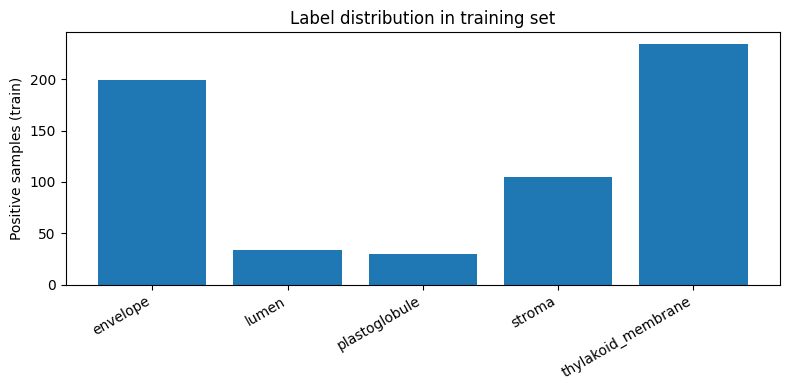

In [118]:
import numpy as np
import matplotlib.pyplot as plt

pos_counts = Y_train.sum(axis=0)
plt.figure(figsize=(8,4))
plt.bar(label_cols, pos_counts)
plt.xticks(rotation=30, ha="right")
plt.ylabel("Positive samples (train)")
plt.title("Label distribution in training set")
plt.tight_layout()
plt.show()


- Training labels are imbalanced: thylakoid_membrane and envelope dominate, while lumen and plastoglobule are rare. This motivates using micro-F1 and class-imbalance handlin

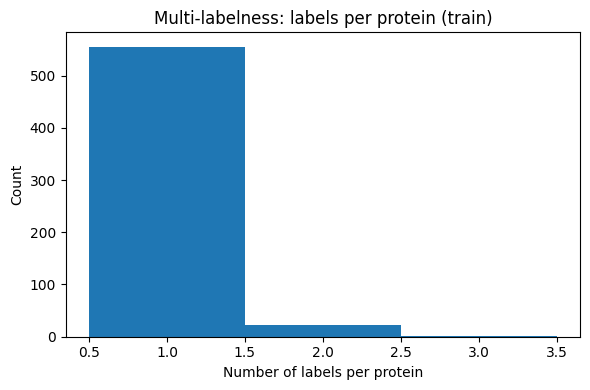

In [119]:
counts = Y_train.sum(axis=1)
plt.figure(figsize=(6,4))
plt.hist(counts, bins=np.arange(0.5, counts.max()+1.5, 1))
plt.xlabel("Number of labels per protein")
plt.ylabel("Count")
plt.title("Multi-labelness: labels per protein (train)")
plt.tight_layout()
plt.show()


- Most proteins have 1 label, but a small fraction have 2–3 labels, confirming this is a multi-label task.

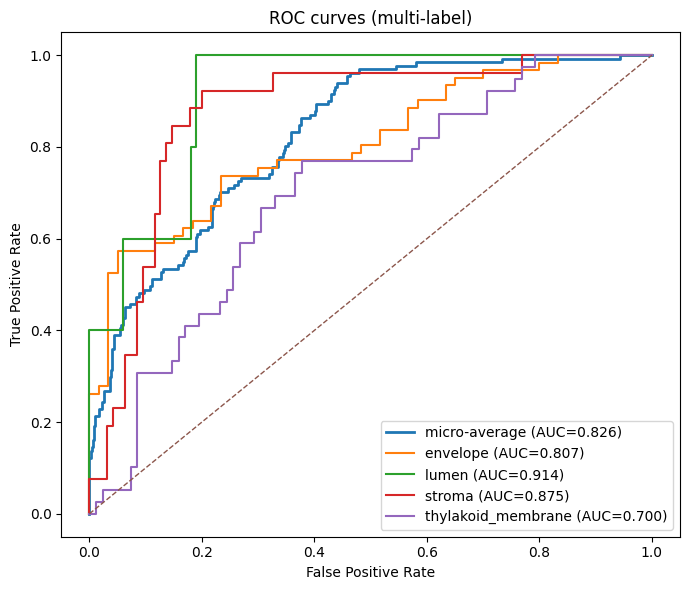

In [120]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(7,6))

micro_fpr, micro_tpr, _ = roc_curve(ytrue.ravel(), probs.ravel())
plt.plot(micro_fpr, micro_tpr, linewidth=2, label=f"micro-average (AUC={auc(micro_fpr, micro_tpr):.3f})")

for j, lab in enumerate(label_cols):
    if ytrue[:, j].sum() == 0:  # no positives in test
        continue
    fpr, tpr, _ = roc_curve(ytrue[:, j], probs[:, j])
    plt.plot(fpr, tpr, linewidth=1.5, label=f"{lab} (AUC={auc(fpr, tpr):.3f})")

plt.plot([0,1],[0,1], linestyle="--", linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves (multi-label)")
plt.legend()
plt.tight_layout()
plt.show()


- ROC curves demonstrate the model’s ability to rank positives above negatives across thresholds. Micro-average ROC summarizes overall performance

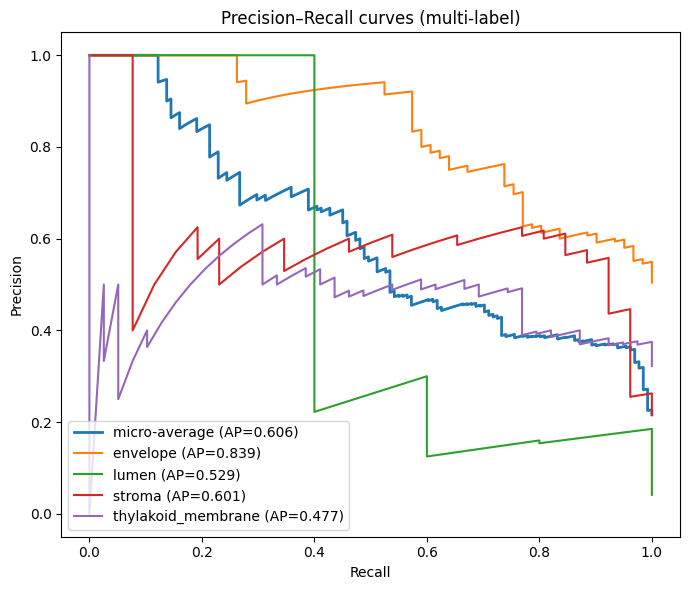

In [121]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(7,6))

# micro-average PR
prec, rec, _ = precision_recall_curve(ytrue.ravel(), probs.ravel())
ap_micro = average_precision_score(ytrue, probs, average="micro")
plt.plot(rec, prec, linewidth=2, label=f"micro-average (AP={ap_micro:.3f})")

for j, lab in enumerate(label_cols):
    if ytrue[:, j].sum() == 0:
        continue
    p, r, _ = precision_recall_curve(ytrue[:, j], probs[:, j])
    ap = average_precision_score(ytrue[:, j], probs[:, j])
    plt.plot(r, p, linewidth=1.5, label=f"{lab} (AP={ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall curves (multi-label)")
plt.legend()
plt.tight_layout()
plt.show()


- PR curves highlight performance under class imbalance. Lower AP for rare labels reflects limited positive examples

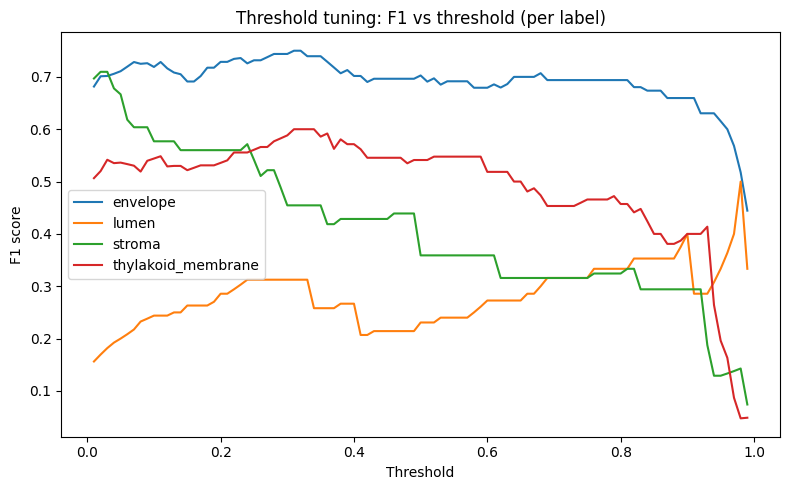

In [122]:
from sklearn.metrics import f1_score

ts = np.linspace(0.01, 0.99, 99)
plt.figure(figsize=(8,5))

for j, lab in enumerate(label_cols):
    if ytrue[:, j].sum() == 0:
        continue
    f1s = []
    for t in ts:
        pred = (probs[:, j] >= t).astype(int)
        f1s.append(f1_score(ytrue[:, j], pred, zero_division=0))
    plt.plot(ts, f1s, linewidth=1.5, label=lab)

plt.xlabel("Threshold")
plt.ylabel("F1 score")
plt.title("Threshold tuning: F1 vs threshold (per label)")
plt.legend()
plt.tight_layout()
plt.show()


- Optimal thresholds vary by label due to imbalance and differing score calibration; tuning thresholds improves micro-F1.

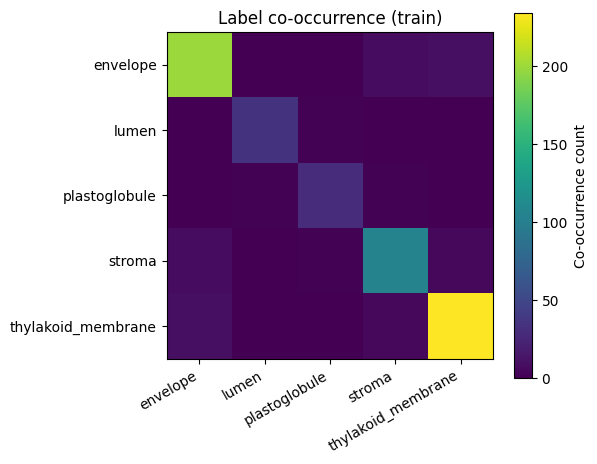

In [123]:
import numpy as np
import matplotlib.pyplot as plt

C = (Y_train.T @ Y_train).astype(int)  # co-occurrence counts
plt.figure(figsize=(6,5))
plt.imshow(C, interpolation="nearest")
plt.colorbar(label="Co-occurrence count")
plt.xticks(range(len(label_cols)), label_cols, rotation=30, ha="right")
plt.yticks(range(len(label_cols)), label_cols)
plt.title("Label co-occurrence (train)")
plt.tight_layout()
plt.show()


- Co-occurrence analysis reveals which locations are frequently jointly annotated, supporting the multi-label formulation.